# Importing Standard Libraries

In [77]:
# Standard Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn import metrics

# Importing Data Sets

In [2]:
# reading csv files

order_payments=pd.read_csv('olist_order_payments_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
customers=pd.read_csv('olist_customers_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')

In [3]:
# grouping the columns

items=order_items.groupby(by=['order_id'])[['order_item_id']].agg('count').reset_index()
order_payment=order_payments.groupby(by=['order_id'])[['payment_value']].agg('sum')

In [4]:
# merging the datasets and creating master dataframe

df1=customers.merge(orders,on='customer_id')
df2=df1.merge(items,on='order_id')
final_df=df2.merge(order_payment,on='order_id')
final_df.shape

(98665, 14)

# Exploratory Data Analysis

In [5]:
# checking the datatype
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    98665 non-null  object 
 1   customer_unique_id             98665 non-null  object 
 2   customer_zip_code_prefix       98665 non-null  int64  
 3   customer_city                  98665 non-null  object 
 4   customer_state                 98665 non-null  object 
 5   order_id                       98665 non-null  object 
 6   order_status                   98665 non-null  object 
 7   order_purchase_timestamp       98665 non-null  object 
 8   order_approved_at              98651 non-null  object 
 9   order_delivered_carrier_date   97656 non-null  object 
 10  order_delivered_customer_date  96475 non-null  object 
 11  order_estimated_delivery_date  98665 non-null  object 
 12  order_item_id                  98665 non-null 

In [6]:
# converting date columns to datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    final_df[col] = pd.to_datetime(final_df[col], format='%Y-%m-%d %H:%M:%S')
    
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    98665 non-null  object        
 1   customer_unique_id             98665 non-null  object        
 2   customer_zip_code_prefix       98665 non-null  int64         
 3   customer_city                  98665 non-null  object        
 4   customer_state                 98665 non-null  object        
 5   order_id                       98665 non-null  object        
 6   order_status                   98665 non-null  object        
 7   order_purchase_timestamp       98665 non-null  datetime64[ns]
 8   order_approved_at              98651 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97656 non-null  datetime64[ns]
 10  order_delivered_customer_date  96475 non-null  datetime64[ns]
 11  order_estimated

In [7]:
# preparing new columns for analysis


final_df['delivery_against_estimated'] = (final_df['order_estimated_delivery_date'] - final_df['order_delivered_customer_date']).dt.days
final_df['order_purchase_year'] = final_df.order_purchase_timestamp.apply(lambda x: x.year)
final_df['order_purchase_month'] = final_df.order_purchase_timestamp.apply(lambda x: x.month)
final_df['order_purchase_dayofweek'] = final_df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
final_df['order_purchase_hour'] = final_df.order_purchase_timestamp.apply(lambda x: x.hour)
final_df['order_purchase_day'] = final_df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
final_df['order_purchase_mon'] = final_df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})



In [8]:
# Changing the month attribute for correct ordenation

final_df['month_year'] = final_df['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
final_df['month_year'] = final_df['order_purchase_year'].astype(str) + '-' + final_df['month_year'].astype(str)


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    98665 non-null  object        
 1   customer_unique_id             98665 non-null  object        
 2   customer_zip_code_prefix       98665 non-null  int64         
 3   customer_city                  98665 non-null  object        
 4   customer_state                 98665 non-null  object        
 5   order_id                       98665 non-null  object        
 6   order_status                   98665 non-null  object        
 7   order_purchase_timestamp       98665 non-null  datetime64[ns]
 8   order_approved_at              98651 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97656 non-null  datetime64[ns]
 10  order_delivered_customer_date  96475 non-null  datetime64[ns]
 11  order_estimated

In [10]:
final_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,146.87,10.0,2017,5,1,15,Tue,May,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,335.48,7.0,2018,1,4,20,Fri,Jan,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,157.73,-2.0,2018,5,5,16,Sat,May,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,173.30,12.0,2018,3,1,16,Tue,Mar,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,252.25,5.0,2018,7,6,9,Sun,Jul,2018-07


In [11]:
# displaying missing value counts and corresponding percentage against total observations
missing_values = final_df.isnull().sum().sort_values(ascending = False)
percentage = round((final_df.isnull().sum()/final_df.isnull().count()*100),2).sort_values(ascending = False)
nv=pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage'])

In [12]:
nv.head()

,Values,Percentage
order_delivered_customer_date,2190,2.22
delivery_against_estimated,2190,2.22
order_delivered_carrier_date,1009,1.02
order_approved_at,14,0.01
customer_unique_id,0,0.00


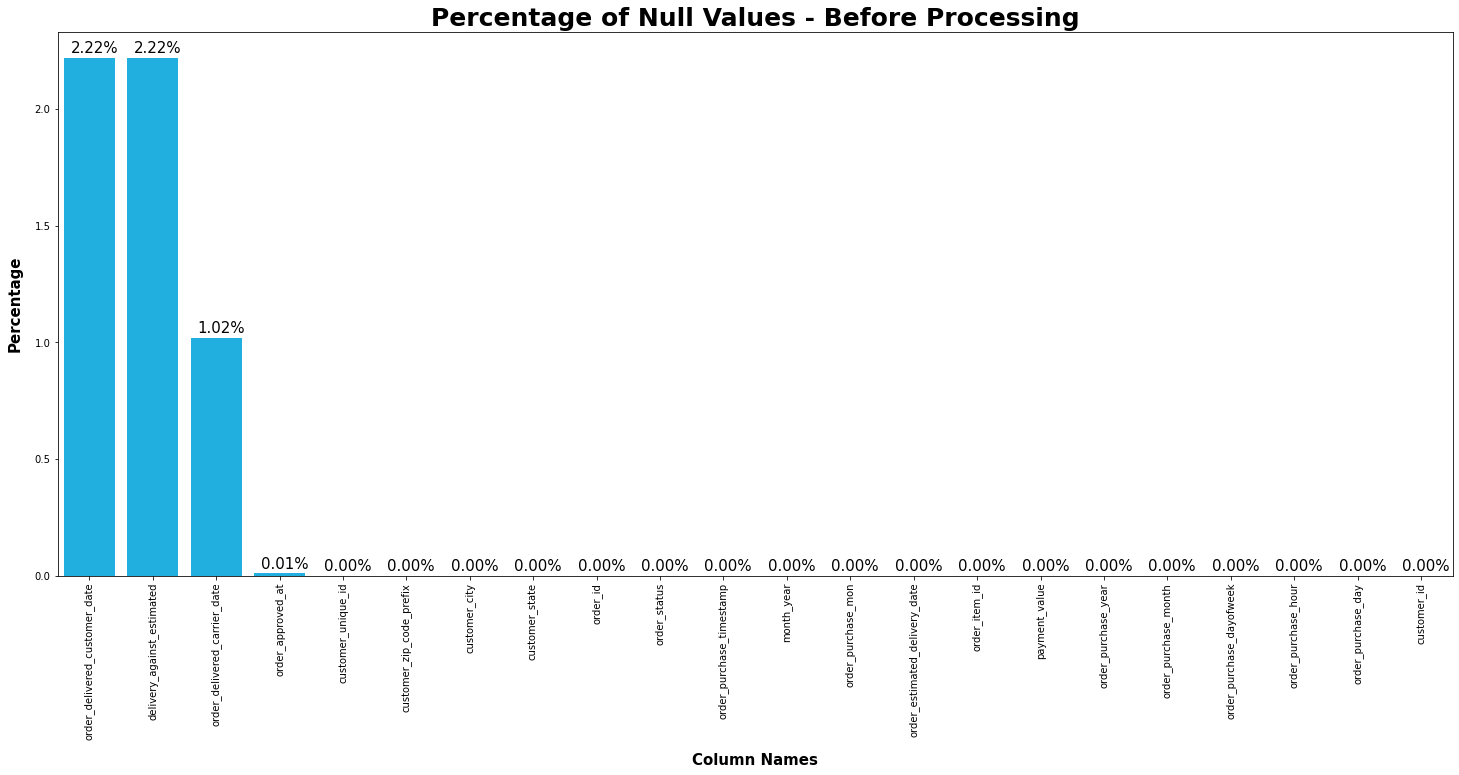

In [13]:
# plotting the null values

fig,ax = plt.subplots(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)

sns.barplot(data=nv,x=nv.index,y=nv['Percentage'],color='deepskyblue',ax=ax)
ax.set_title('Percentage of Null Values - Before Processing',fontsize=25,weight='bold')
ax.set_xlabel("Column Names",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel("Percentage",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate('{:0.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.02),size=15)

In [14]:
# dropping columns which is not required for further analysis

final_df.drop(['customer_id','customer_zip_code_prefix','order_delivered_customer_date',
               'order_delivered_carrier_date','order_approved_at','delivery_against_estimated'],axis=1,inplace=True)

In [15]:
# displaying missing value counts and corresponding percentage against total observations

missing_values = final_df.isnull().sum().sort_values(ascending = False)
percentage = round((final_df.isnull().sum()/final_df.isnull().count()*100),2).sort_values(ascending = False)
nv=pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage'])

In [17]:
# displaying final shape of data
final_df.shape

(98665, 16)

In [18]:
# displaying summary statistics of final dataframe

final_df.describe()

,order_item_id,payment_value,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour
count,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000,98665.000000
mean,1.141712,160.606904,2017.541874,6.026109,2.756763,14.774783
std,0.538423,220.484252,0.504533,3.230218,1.967077,5.327313
min,1.000000,9.590000,2016.000000,1.000000,0.000000,0.000000
25%,1.000000,62.000000,2017.000000,3.000000,1.000000,11.000000
50%,1.000000,105.290000,2018.000000,6.000000,3.000000,15.000000
75%,1.000000,176.880000,2018.000000,8.000000,4.000000,19.000000
max,21.000000,13664.080000,2018.000000,12.000000,6.000000,23.000000


In [19]:
final_df.columns

Index(['customer_unique_id', 'customer_city', 'customer_state', 'order_id',
       'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'order_item_id', 'payment_value',
       'order_purchase_year', 'order_purchase_month',
       'order_purchase_dayofweek', 'order_purchase_hour', 'order_purchase_day',
       'order_purchase_mon', 'month_year'],
      dtype='object')

In [20]:
final_df['order_status'].value_counts()

delivered      96477
shipped         1106
canceled         461
invoiced         312
processing       301
unavailable        6
approved           2
Name: order_status, dtype: int64

In [21]:
# final dataframe with oly delivered items

final_df=final_df[final_df['order_status']=='delivered']

In [22]:
final_df.shape

(96477, 16)

### Monthly Revenue

In [23]:
# Monthly Revenue 
df_revenue = final_df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue

,month_year,payment_value
0,2016-10,46566.71
1,2016-12,19.62
2,2017-01,127545.67
3,2017-02,271298.65
4,2017-03,414369.39
5,2017-04,390952.18
6,2017-05,567066.73
7,2017-06,490225.60
8,2017-07,566403.93
9,2017-08,646000.61


In [24]:
# excluding incomplete data from the year 2016
final_df = final_df.query("month_year != '2016-12' and month_year != '2016-10'")

In [25]:
# Monthly Revenue 
df_revenue = final_df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue.head(5)

,month_year,payment_value
0,2017-01,127545.67
1,2017-02,271298.65
2,2017-03,414369.39
3,2017-04,390952.18
4,2017-05,567066.73


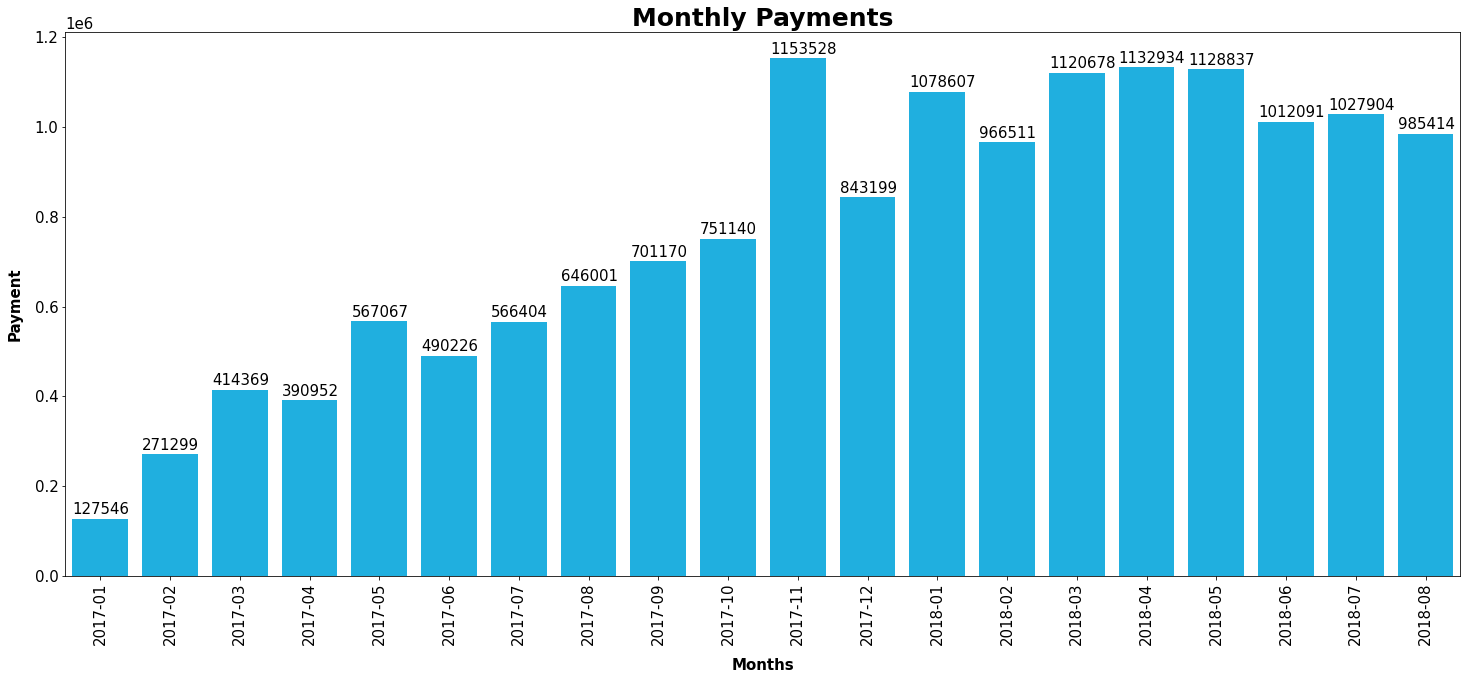

In [26]:
# plotting the monthly revenue 

fig,ax = plt.subplots(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)


sns.barplot(x="month_year",y='payment_value' ,data=df_revenue,color='deepskyblue',ax=ax)
ax.set_title('Monthly Payments',fontsize=25,weight='bold')
ax.set_xlabel("Months",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel("Payment",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10000),size=15)

In [27]:
#calculating for monthly revenue growth rate 
# using pct_change() function to see monthly percentage change

df_revenue['MonthlyGrowth'] = df_revenue['payment_value'].pct_change()
df_revenue.head(5)

,month_year,payment_value,MonthlyGrowth
0,2017-01,127545.67,NaN
1,2017-02,271298.65,1.127071
2,2017-03,414369.39,0.527355
3,2017-04,390952.18,-0.056513
4,2017-05,567066.73,0.450476


### Monthly customer count

In [28]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_active = final_df.groupby('month_year')['customer_unique_id'].nunique().reset_index()
df_monthly_active

,month_year,customer_unique_id
0,2017-01,718
1,2017-02,1630
2,2017-03,2508
3,2017-04,2274
4,2017-05,3479
5,2017-06,3076
6,2017-07,3802
7,2017-08,4114
8,2017-09,4083
9,2017-10,4417


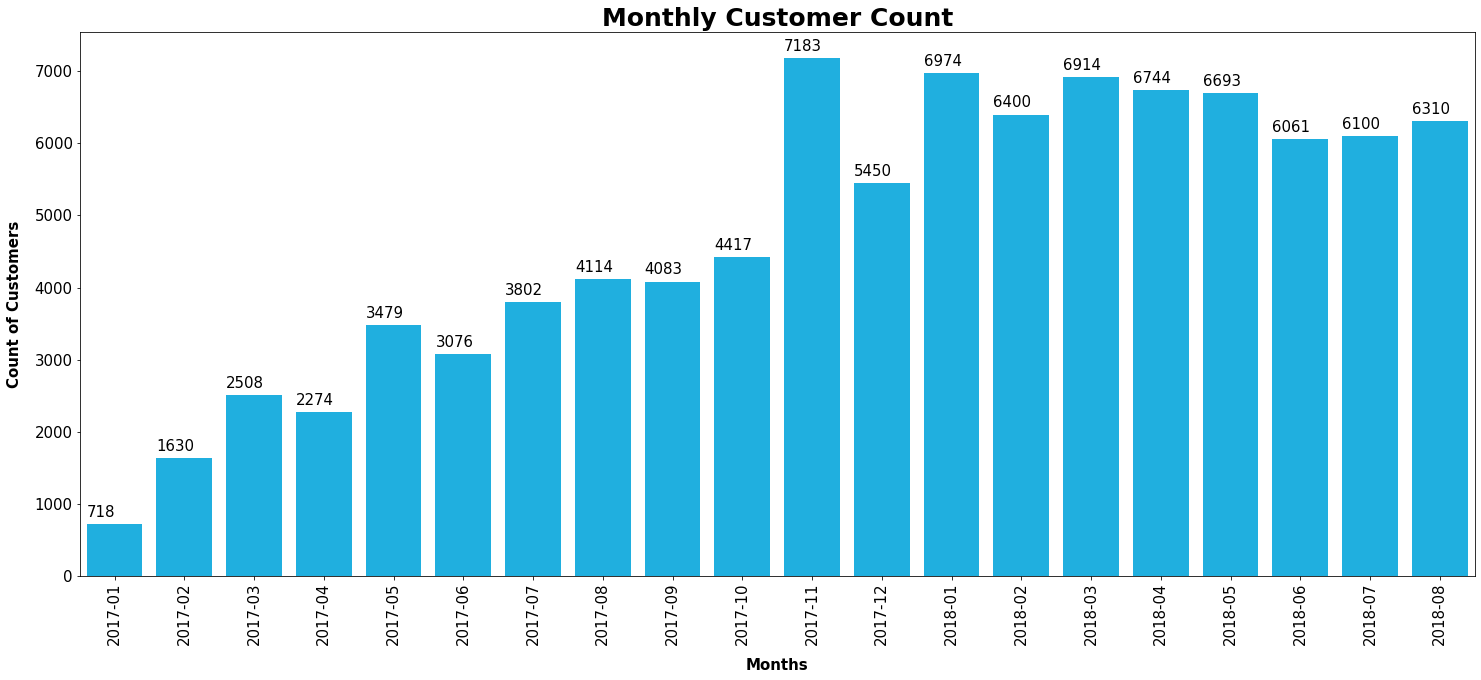

In [29]:
# plotting the monthly active customers

fig,ax = plt.subplots(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)


sns.barplot(x="month_year",y='customer_unique_id' ,data=df_monthly_active,color='deepskyblue',ax=ax)
ax.set_title('Monthly Customer Count',fontsize=25,weight='bold')
ax.set_xlabel("Months",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel('Count of Customers',fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+100),size=15)

### Monthly order count

In [30]:
#creating monthly active customers dataframe by counting unique Customer IDs

df_monthly_sales = final_df.groupby('month_year')['order_id'].count().reset_index()
df_monthly_sales.head(5)

,month_year,order_id
0,2017-01,750
1,2017-02,1653
2,2017-03,2546
3,2017-04,2303
4,2017-05,3546


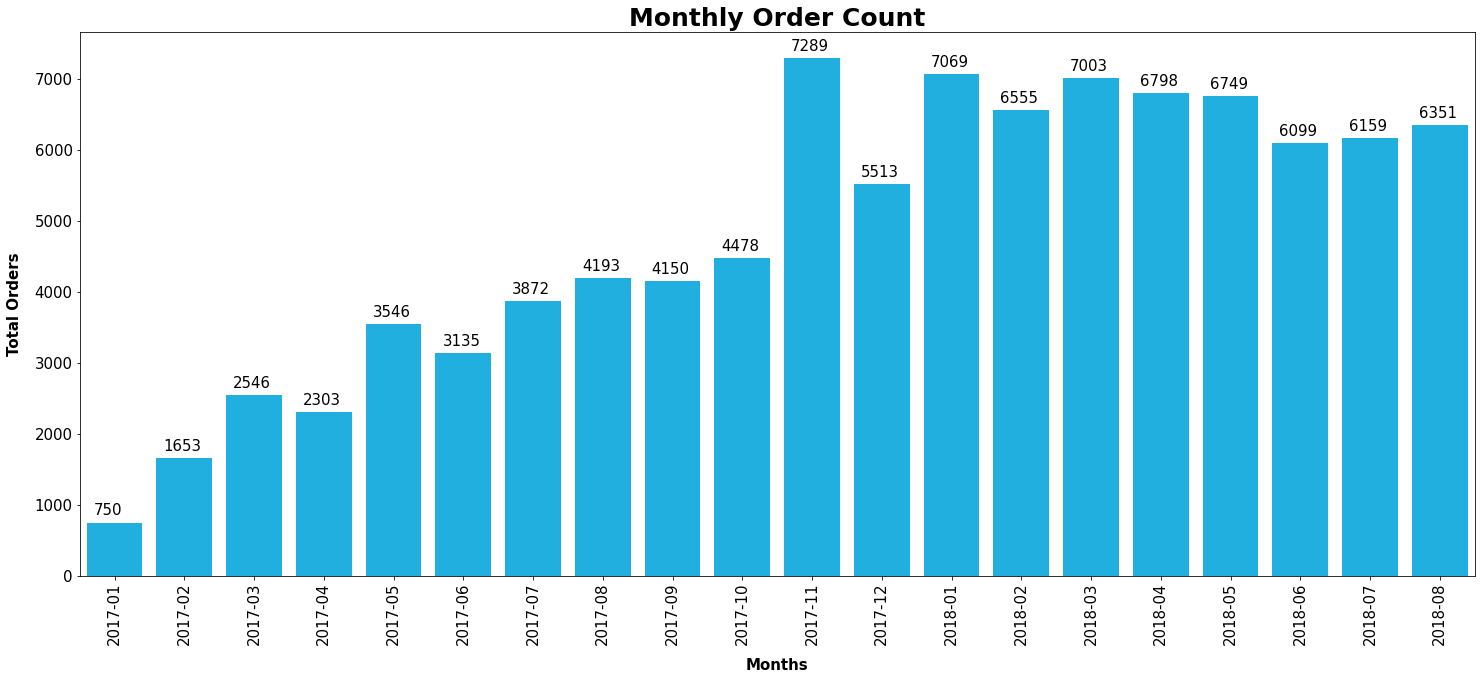

In [31]:
# plotting the order count

fig,ax = plt.subplots(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)


sns.barplot(x="month_year",y='order_id' ,data=df_monthly_sales,color='deepskyblue',ax=ax)
ax.set_title('Monthly Order Count',fontsize=25,weight='bold')
ax.set_xlabel("Months",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel('Total Orders',fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100),size=15)

# RFM Analysis

### Recency Calculation

In [32]:
# last purchase date 
final_df['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [33]:
final_df['order_purchase_timestamp'].min()

Timestamp('2017-01-05 11:56:06')

In [34]:
last_date=dt.date(2018,8,30)
print(last_date)

2018-08-30


In [35]:
# creating a new column having date of purchase
final_df['Date']=final_df['order_purchase_timestamp'].dt.date

In [36]:
# grouping customers based on last purchase date
recency_df=final_df.groupby(by='customer_unique_id',as_index=False)['Date'].max()
recency_df.columns=['Customer_unique_id','LastPurchaseDate']
recency_df.head()

,Customer_unique_id,LastPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07
2,0000f46a3911fa3c0805444483337064,2017-03-10
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14


In [37]:
# Recency calculation
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last_date - x).days)
recency_df.head()

,Customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,115
2,0000f46a3911fa3c0805444483337064,2017-03-10,538
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,322
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,289


In [38]:
#dropping LastPurchaseDate from the dataframe since it is not required for further analysis
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [39]:
recency_df.head()

,Customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115
2,0000f46a3911fa3c0805444483337064,538
3,0000f6ccb0745a6a4b88665a16c9f078,322
4,0004aac84e0df4da2b147fca70cf8255,289


In [40]:
recency_df['Customer_unique_id'].nunique()

93104

In [41]:
recency_df.describe()

,Recency
count,93104.000000
mean,237.240086
std,150.946046
min,1.000000
25%,115.000000
50%,219.000000
75%,346.000000
max,602.000000


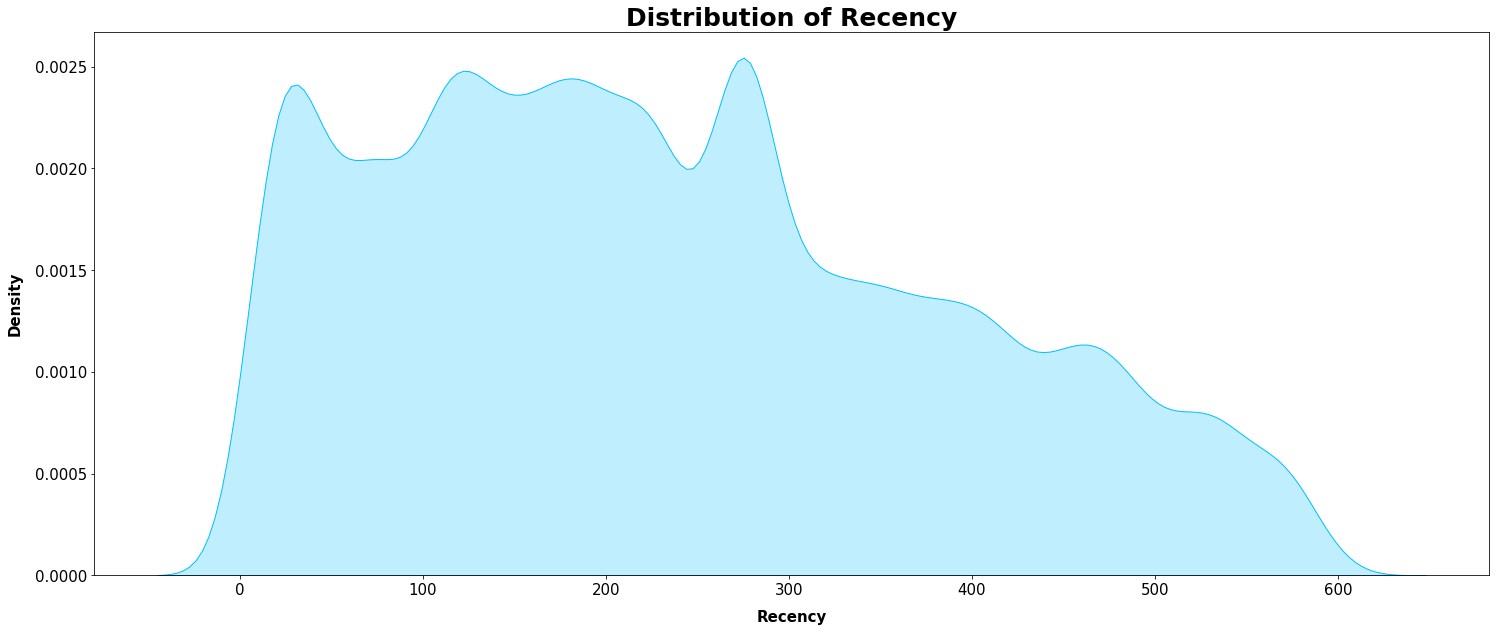

In [42]:
# plotting the distribution for recency

fig,ax = plt.subplots(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)


sns.distplot(recency_df['Recency'],hist=False,color='deepskyblue',ax=ax,kde_kws={"fill":True})
ax.set_title('Distribution of Recency',fontsize=25,weight='bold')
ax.set_xlabel("Recency",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel('Density',fontsize=15,labelpad=20,ha='center',va='center',weight='bold')

plt.show()

### Frequency Calculation

In [43]:
# frequency calculation using customer id and order id

frequency_df = final_df.groupby(by=['customer_unique_id']).order_id.count().reset_index()
frequency_df.columns = ['Customer_unique_id','Frequency']

In [44]:
frequency_df.head()

,Customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [45]:
frequency_df['Customer_unique_id'].nunique()

93104

In [46]:
frequency_df.describe()

,Frequency
count,93104.000000
mean,1.033371
std,0.209012
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [47]:
frequency_df['Frequency'].value_counts()

1     90315
2      2562
3       180
4        28
5         9
6         5
7         3
15        1
9         1
Name: Frequency, dtype: int64

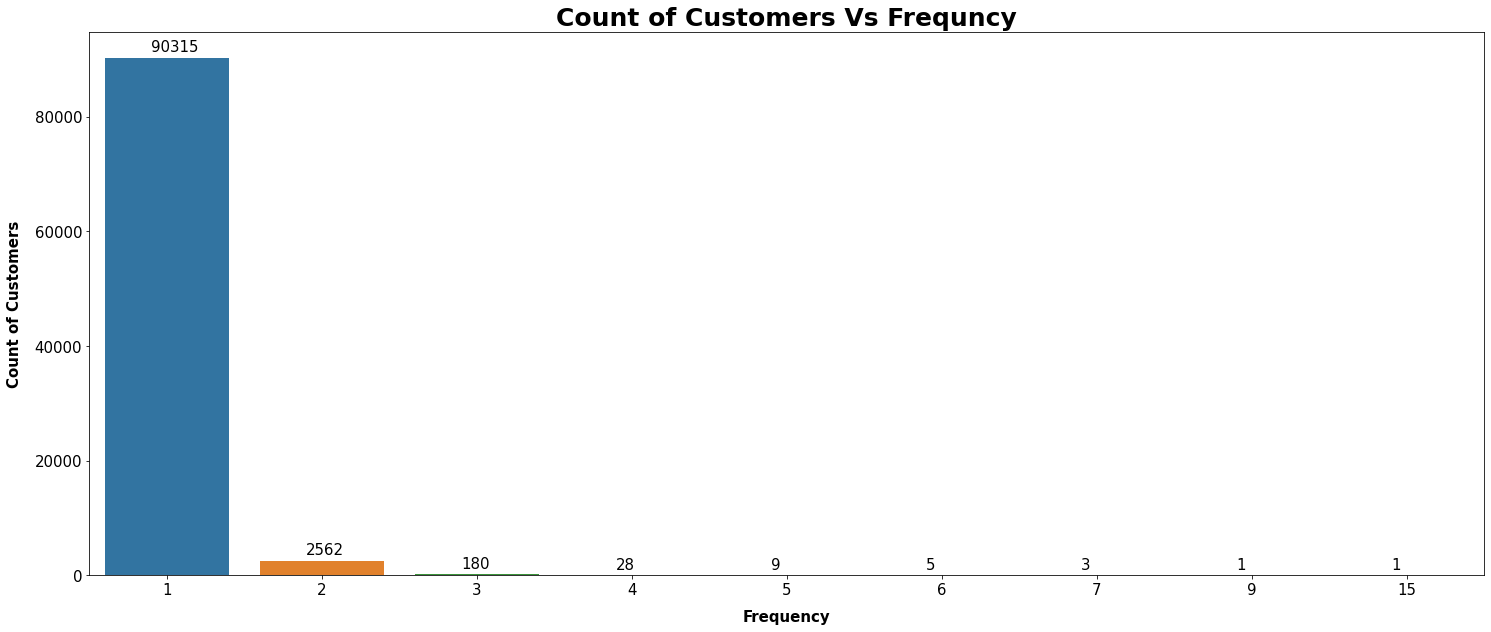

In [48]:
# Visualizing frequencey values

fig,ax = plt.subplots(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)

sns.countplot(x="Frequency", data=frequency_df,ax=ax,dodge=False)
ax.set_title('Count of Customers Vs Frequncy',fontsize=25,weight='bold')
ax.set_xlabel("Frequency",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel('Count of Customers',fontsize=15,labelpad=20,ha='center',va='center',weight='bold')

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1000),fontsize=15)
        

plt.show()

### Monetary Calculation

In [49]:
# monetary calculation using customer id and payment value
monetary_df = final_df.groupby('customer_unique_id').payment_value.sum().reset_index()
monetary_df.columns = ['Customer_unique_id','Monetary']

In [50]:
monetary_df.head()

,Customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [51]:
monetary_df.describe()

,Monetary
count,93104.000000
mean,165.147313
std,226.381578
min,9.590000
25%,63.040000
50%,107.780000
75%,182.495000
max,13664.080000


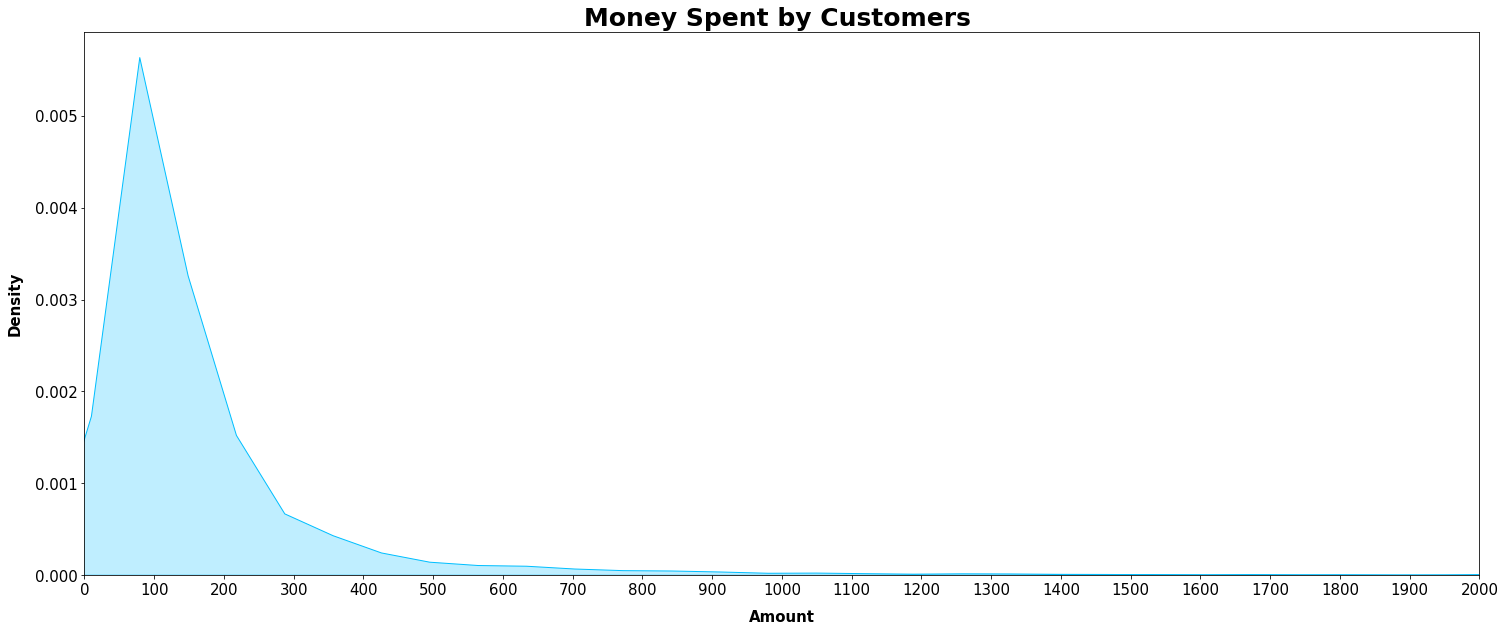

In [52]:
# plotting the distribution for monetary values

fig,ax = plt.subplots(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)
ax.set(xlim=(0,2000))
ax.set_xticks(range(0,2100,100))

sns.distplot(monetary_df['Monetary'],hist=False,color='deepskyblue',ax=ax,kde_kws={"fill":True},bins=200000)
ax.set_title('Money Spent by Customers ',fontsize=25,weight='bold')
ax.set_xlabel("Amount",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel('Density',fontsize=15,labelpad=20,ha='center',va='center',weight='bold')

plt.show()

### RFM Table

In [53]:
# creating RFM table from the identified values
# merging recency and frequency dataframe

rf_df=recency_df.merge(frequency_df,on='Customer_unique_id')
rf_df.head()

,Customer_unique_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1
2,0000f46a3911fa3c0805444483337064,538,1
3,0000f6ccb0745a6a4b88665a16c9f078,322,1
4,0004aac84e0df4da2b147fca70cf8255,289,1


In [54]:
# merging the rf dataframe with monetary dataframe

rfm_df=rf_df.merge(monetary_df,on='Customer_unique_id')
rfm_df.head()

,Customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,538,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89


In [55]:
# converting customer_unique_id as index

rfm_df.set_index('Customer_unique_id',inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
Customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89


In [56]:
# verifying RFM table

final_df[final_df['customer_unique_id']=='0000366f3b9a7992bf8c76cfdf3221e2']

,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,payment_value,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,Date
63518,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-21,1,141.9,2018,5,3,10,Thu,May,2018-05,2018-05-10


In [57]:
(last_date - dt.date(2018,5,10)).days == 112

True

As we can see our RFM table is correct. The first customer bought only once and before 112 days

# Customer Segmentation with RFM values

### Applying RFM Score formula

The simplest and effective way is to create customers segments from RFM Model by using Quartiles.  We assign a score from 1 to 5 to Recency, Frequency and Monetary. Five is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated by combining individual RFM score numbers.

### RFM Quartiles

In [58]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,115.0,1.0,63.040
0.50,219.0,1.0,107.780
0.75,346.0,1.0,182.495


In [59]:
quantiles.to_dict()

{'Recency': {0.25: 115.0, 0.5: 219.0, 0.75: 346.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 63.04, 0.5: 107.78, 0.75: 182.495}}

### Creation of RFM Segmentation table

Two segmentation of classes will be created since high recency is bad for business while high frequency and monetary value is good.

In [60]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]: 
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [61]:
# creating rfm segmentation table with the calculated rfm scores

rfm_segmentation = rfm_df.copy()
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles))

In [62]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
Customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1
0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4


In [63]:
# combining rfm scores

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4,214


Best Recency Score = 4 , Best Frequency Score = 4 , Best Monetary Score = 4.

Ordering the customer based on the best score

In [64]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer_unique_id,,,,,,,
c8460e4251689ba205045f3ea17884a1,22,4,4655.91,4,4,4,444
7b0eaf68a16e4808e5388c67345033c9,103,2,2340.08,4,4,4,444
906a8a4ec9f3d4c3e64fa6d1c4fe6009,41,2,2020.86,4,4,4,444
0341bbd5c969923a0f801b9e2d10a7b8,92,2,1999.68,4,4,4,444
525cda9909aa001ebed396f6e55eae01,23,2,1782.90,4,4,4,444
4facc2e6fbc2bffab2fea92d2b4aa7e4,17,4,1760.75,4,4,4,444
397b44d5bb99eabf54ea9c2b41ebb905,74,4,1756.53,4,4,4,444
87c9e7ba960e4c2e6bd786b162adc639,109,2,1653.98,4,4,4,444
fe81bb32c243a86b2f86fbf053fe6140,70,5,1590.76,4,4,4,444


**Segmenting customer into 6 different categories based on the calculated RFM scores**

In [65]:
rfm_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93104 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     93104 non-null  int64  
 1   Frequency   93104 non-null  int64  
 2   Monetary    93104 non-null  float64
 3   R_Quartile  93104 non-null  int64  
 4   F_Quartile  93104 non-null  int64  
 5   M_Quartile  93104 non-null  int64  
 6   RFMScore    93104 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 5.7+ MB


In [66]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  522
Loyal Customers:  2789
Big Spenders:  23276
Almost Lost:  415
Lost Customers:  341
Lost Cheap Customers:  5916


# Applying K_means clustering on RFM variables

In [67]:
# data preprocessing

rfm_data = rfm_segmentation.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore'],axis=1)
rfm_data.head()

,Recency,Frequency,Monetary
Customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89


**Visualizing feature distributions**

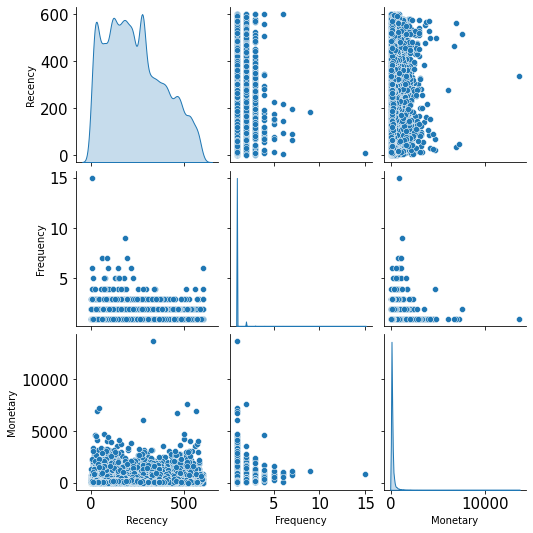

In [68]:
# pair plot

sns.pairplot(rfm_data,diag_kind='kde')
plt.show()

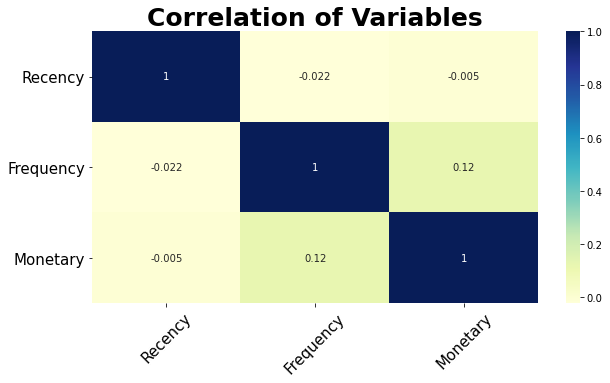

In [69]:
# correlation plot

fig,ax = plt.subplots(figsize=(10,5))

params = {'xtick.labelsize': 10,
          'ytick.labelsize': 10 }
plt.rcParams.update(params)

sns.heatmap(rfm_data.corr(),annot=True,cmap='YlGnBu',ax=ax)
ax.set_title('Correlation of Variables',fontsize=25,weight='bold')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(rotation=360,fontsize=15)
# ax.set_xlabel(fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
# ax.set_ylabel(fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
plt.show()

In [71]:
# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(rfm_data), columns=rfm_data.columns,index=rfm_data.index)

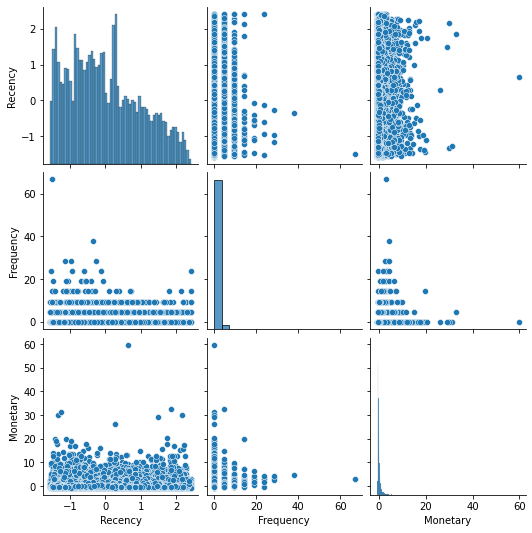

In [72]:
sns.pairplot(X)
plt.show()

There exists only few outliers but in business point of view thosw customers may be required for further analysis. Hence carryouting the analysis with those customers

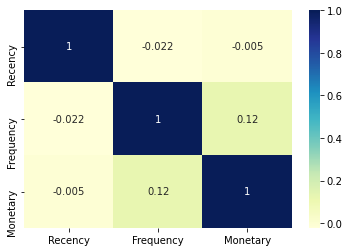

In [73]:
sns.heatmap(X.corr(),annot=True,cmap='YlGnBu')
plt.show()

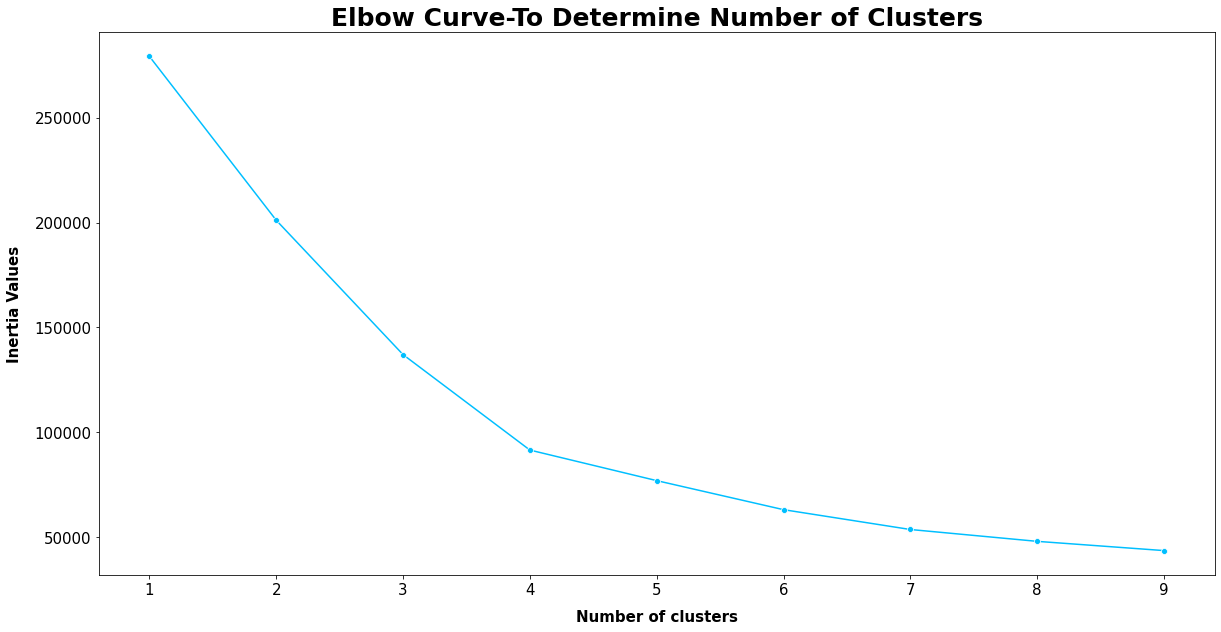

In [74]:
from sklearn.cluster import KMeans

wcss = [] #inertia (within cluster sum square) or total spread

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

fig,ax = plt.subplots(figsize=(20,10))

params = {'xtick.labelsize': 10,
          'ytick.labelsize': 10 }
plt.rcParams.update(params)

sns.lineplot(range(1,10), wcss, color='deepskyblue',marker='o',ax=ax)
ax.set_title('Elbow Curve-To Determine Number of Clusters',fontsize=25,weight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel("Number of clusters",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel("Inertia Values",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
plt.show()

In [78]:
# # Silhouette scores for various clusters
for k in range(2,10):
    km=KMeans(n_clusters=k,n_init=15,random_state=2)
    km.fit(X)
    cluster_labels = km.labels_
    print(f'Number of clusetrs : {k},Silhouette Score: {metrics.silhouette_score(X,cluster_labels)}')

Number of clusetrs : 2,Silhouette Score: 0.7389864051118484
Number of clusetrs : 3,Silhouette Score: 0.45744704822068105
Number of clusetrs : 4,Silhouette Score: 0.49012741649292557
Number of clusetrs : 5,Silhouette Score: 0.4200982774037127
Number of clusetrs : 6,Silhouette Score: 0.43796648034006574
Number of clusetrs : 7,Silhouette Score: 0.4410824800339553
Number of clusetrs : 8,Silhouette Score: 0.44733205759103456
Number of clusetrs : 9,Silhouette Score: 0.39194730006126516


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7389864051118484


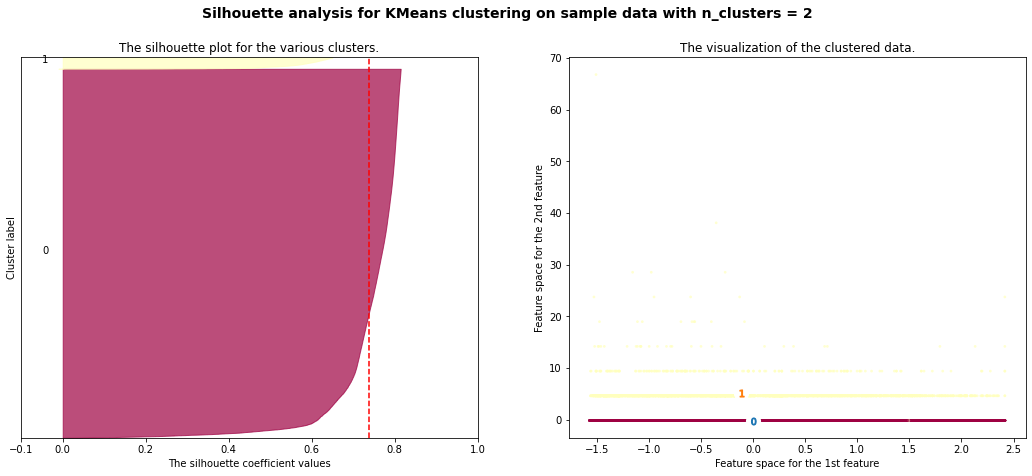

For n_clusters = 3 The average silhouette_score is : 0.45744704822068105


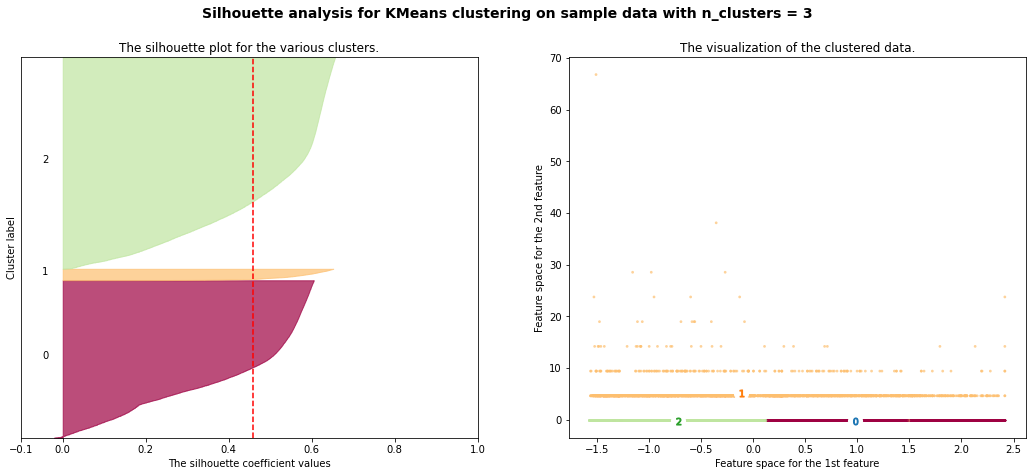

For n_clusters = 4 The average silhouette_score is : 0.49012741649292557


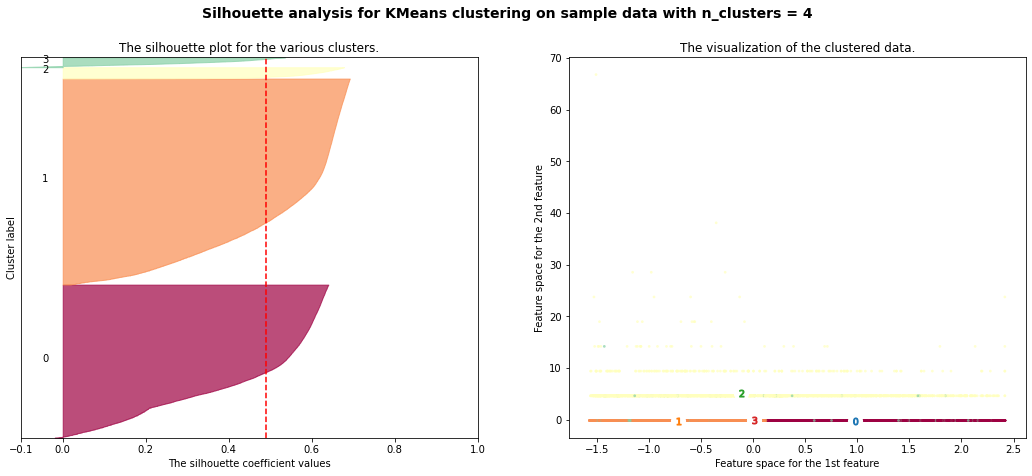

For n_clusters = 5 The average silhouette_score is : 0.4200952035336991


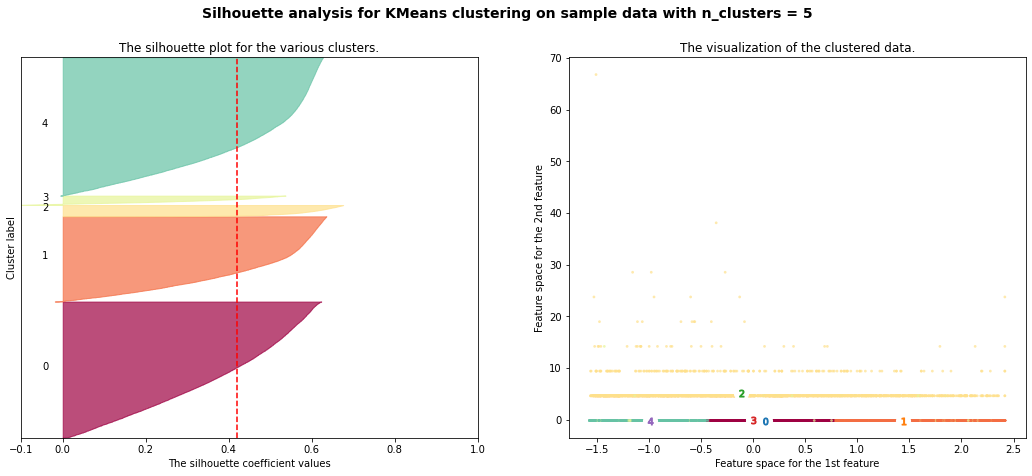

For n_clusters = 6 The average silhouette_score is : 0.4380096883354618


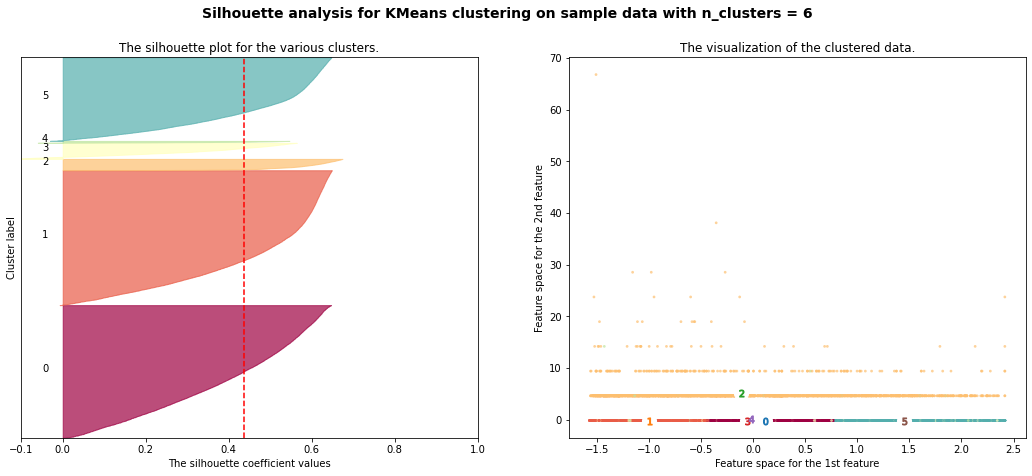

For n_clusters = 7 The average silhouette_score is : 0.4410810301552514


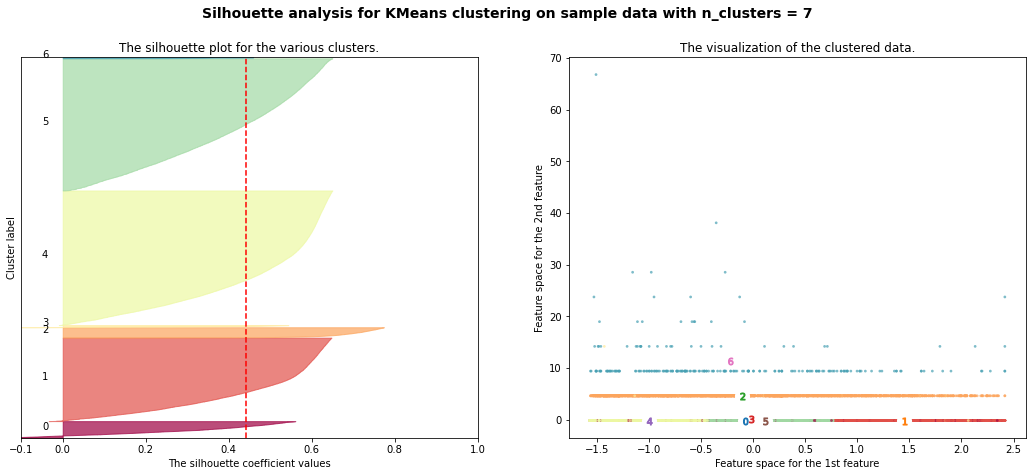

For n_clusters = 8 The average silhouette_score is : 0.4470458467833906


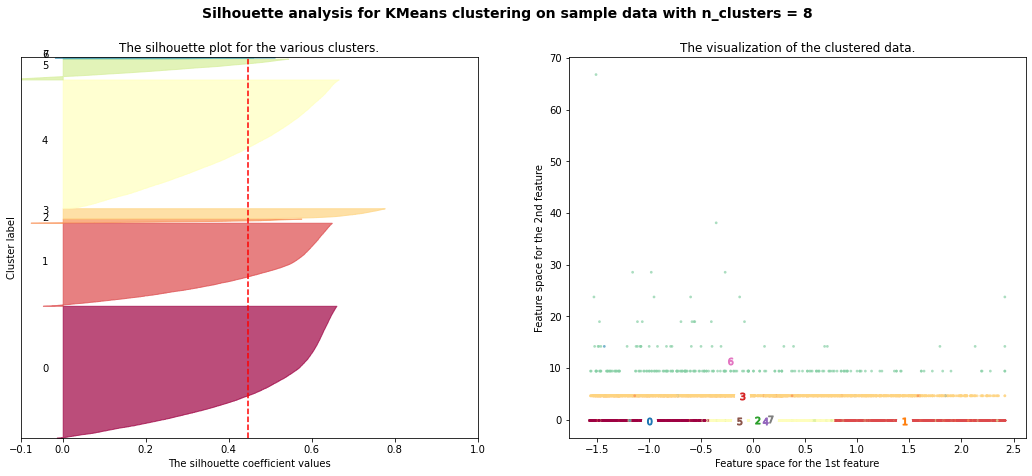

For n_clusters = 9 The average silhouette_score is : 0.3919031581207239


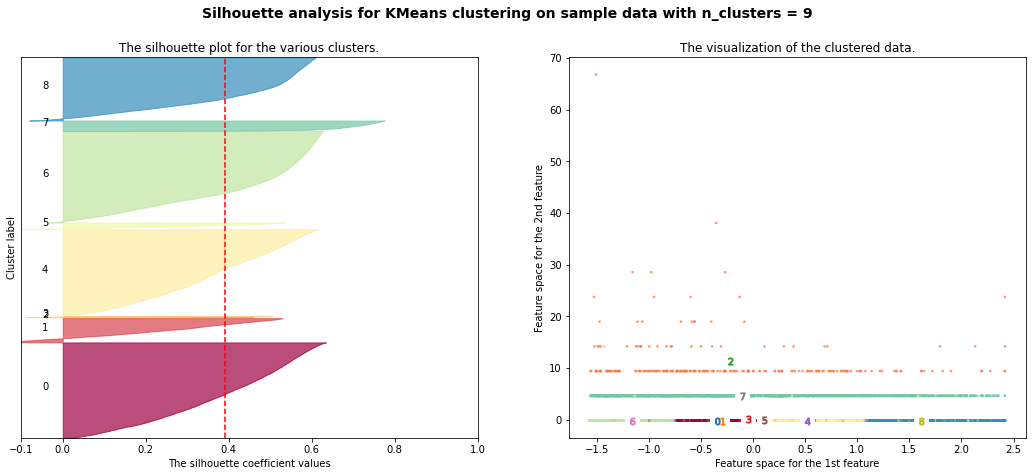

For n_clusters = 10 The average silhouette_score is : 0.382271374494562


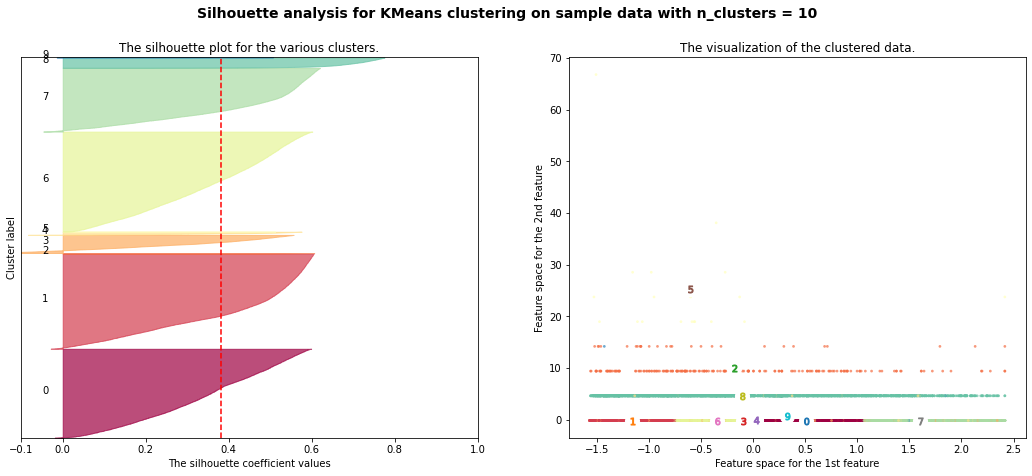

In [79]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X.values


range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [80]:
# initializing cluster value
k=4

In [81]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=k,n_init=15,random_state=2)
km.fit(X)

KMeans(n_clusters=4, n_init=15, random_state=2)

In [82]:
# Review output cluster labels
cluster_labels = km.labels_
print("Assigned cluster labels: \n", cluster_labels)

Assigned cluster labels: 
 [1 1 0 ... 0 1 0]


In [83]:
# Review Centroids of clusters
centroids = km.cluster_centers_
print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[ 0.98060016 -0.15966259 -0.14075583]
 [-0.72316974 -0.15966259 -0.13638542]
 [ 0.0081404  -0.09845031  4.39011716]
 [-0.11251714  5.17255045  0.54990243]]


In [84]:
# silhouttescore
from sklearn import metrics
metrics.silhouette_score(X, cluster_labels, metric='euclidean')

0.49012741649292557

In [85]:
from scikitplot.metrics import plot_silhouette

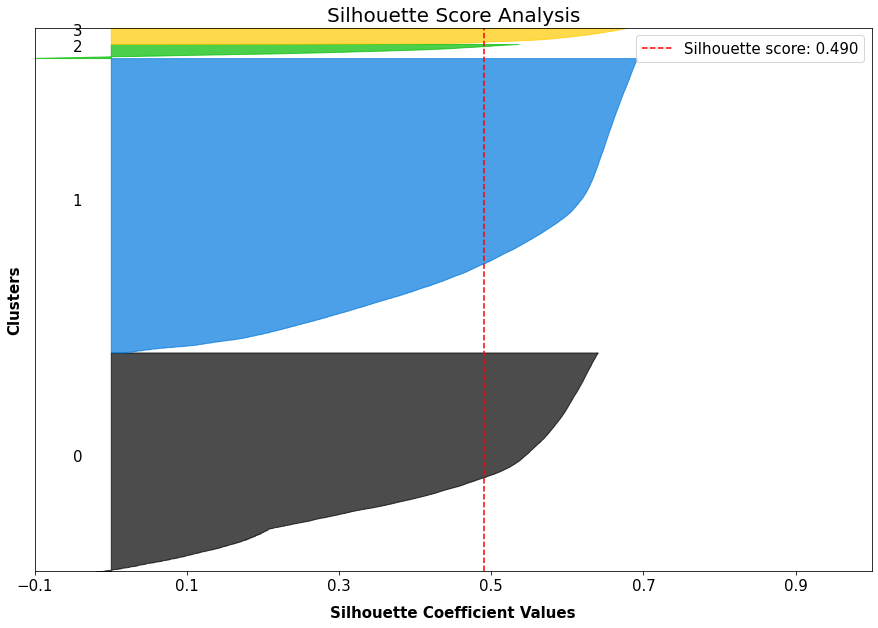

In [86]:
# Plotting Silhouette Score
fig,ax = plt.subplots(figsize=(15,10))
plot_silhouette(X, cluster_labels,title='Silhouette Score Analysis',ax=ax,title_fontsize=20,text_fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel("Silhouette Coefficient Values",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel("Clusters",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
plt.show()

In [91]:
# Append clusters to input features table
rfm_data['clusters'] = cluster_labels
rfm_data.head()

,Recency,Frequency,Monetary,clusters
Customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1
0000f46a3911fa3c0805444483337064,538,1,86.22,0
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,0
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,0


In [92]:
rfm_data['clusters'].value_counts()

1    50434
0    37494
3     2760
2     2416
Name: clusters, dtype: int64

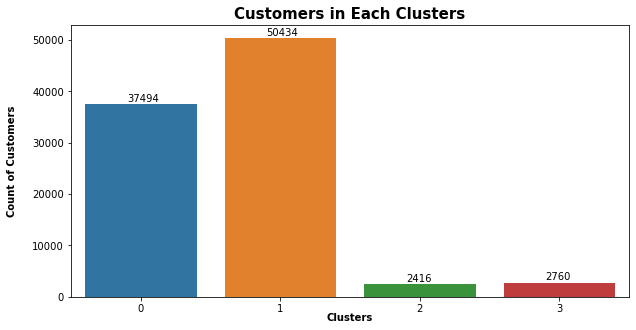

In [93]:
# Visualizing frequencey values

fig,ax = plt.subplots(figsize=(10,5))

params = {'xtick.labelsize': 10,
          'ytick.labelsize': 10 }
plt.rcParams.update(params)

sns.countplot(x="clusters", data=rfm_data,ax=ax,dodge=False)
ax.set_title('Customers in Each Clusters',fontsize=15,weight='bold')
ax.set_xlabel("Clusters",fontsize=10,ha='center',va='center',weight='bold')
ax.set_ylabel('Count of Customers',fontsize=10,labelpad=20,ha='center',va='center',weight='bold')

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500),fontsize=10)        

plt.show()

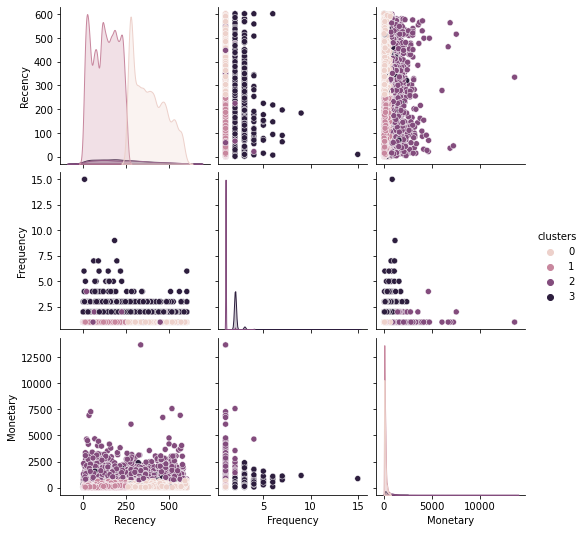

In [94]:
sns.pairplot(rfm_data,hue='clusters')
plt.show()

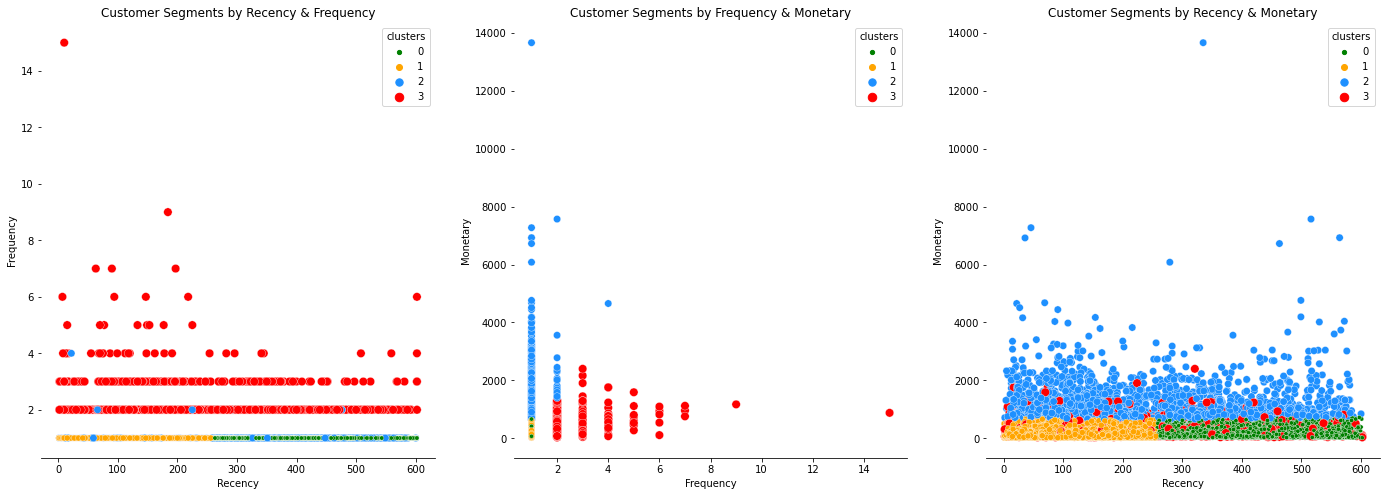

In [95]:
# plotting the distribution of the continous feature set

fig, axs = plt.subplots(1, 3, figsize=(24,8))
sns.despine(left=True)
sns.scatterplot(x='Recency', y='Frequency', ax=axs[0], hue='clusters', data=rfm_data, size='clusters',palette=['green','orange','dodgerblue','red'], legend='full')
sns.scatterplot(x='Frequency', y='Monetary', ax=axs[1], hue='clusters', data=rfm_data, size='clusters',palette=['green','orange','dodgerblue','red'], legend='full')
sns.scatterplot(x='Recency', y='Monetary', ax=axs[2], hue='clusters', data=rfm_data, size='clusters',palette=['green','orange','dodgerblue','red'], legend='full')
axs[0].set_title('Customer Segments by Recency & Frequency')
axs[1].set_title('Customer Segments by Frequency & Monetary')
axs[2].set_title('Customer Segments by Recency & Monetary')
plt.show()

In [96]:
# combining dataset to analyse the cluters

data=rfm_data.reset_index()
data.head()

,Customer_unique_id,Recency,Frequency,Monetary,clusters
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1
2,0000f46a3911fa3c0805444483337064,538,1,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,0


In [97]:
data.rename(columns={'Customer_unique_id':'customer_unique_id'},inplace=True)

In [98]:
data.head()

,customer_unique_id,Recency,Frequency,Monetary,clusters
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1
2,0000f46a3911fa3c0805444483337064,538,1,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,0


In [99]:
data.shape

(93104, 5)

In [100]:
df_full=data.merge(final_df,how='left',on='customer_unique_id')

In [101]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96211 entries, 0 to 96210
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_unique_id             96211 non-null  object        
 1   Recency                        96211 non-null  int64         
 2   Frequency                      96211 non-null  int64         
 3   Monetary                       96211 non-null  float64       
 4   clusters                       96211 non-null  int32         
 5   customer_city                  96211 non-null  object        
 6   customer_state                 96211 non-null  object        
 7   order_id                       96211 non-null  object        
 8   order_status                   96211 non-null  object        
 9   order_purchase_timestamp       96211 non-null  datetime64[ns]
 10  order_estimated_delivery_date  96211 non-null  datetime64[ns]
 11  order_item_id  

In [102]:
df_full.shape

(96211, 21)

In [103]:
df_full.isna().sum()

customer_unique_id               0
Recency                          0
Frequency                        0
Monetary                         0
clusters                         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
order_item_id                    0
payment_value                    0
order_purchase_year              0
order_purchase_month             0
order_purchase_dayofweek         0
order_purchase_hour              0
order_purchase_day               0
order_purchase_mon               0
month_year                       0
Date                             0
dtype: int64

In [104]:
df_full.duplicated().sum()

0

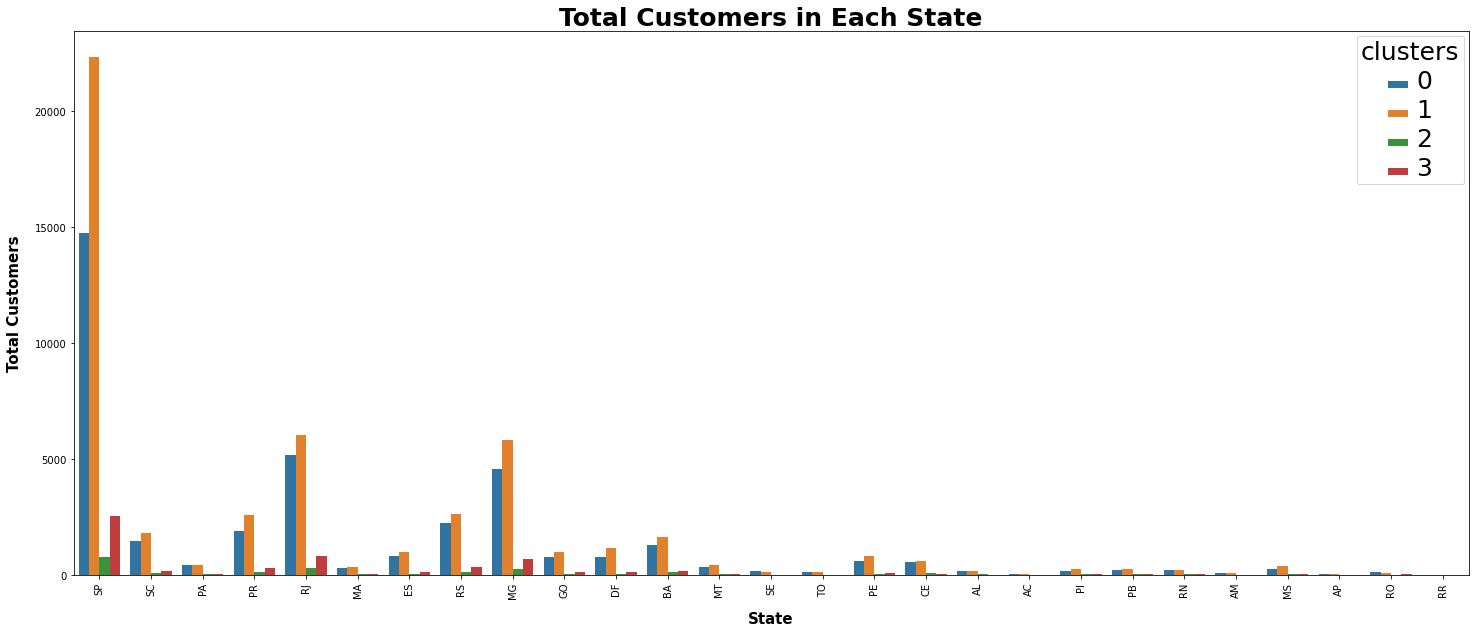

In [105]:
# plotting the order count

fig,ax = plt.subplots(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)


sns.countplot(df_full['customer_state'],hue=df_full['clusters'],ax=ax)
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title
ax.set_title('Total Customers in Each State',fontsize=25,weight='bold')
ax.set_xlabel("State",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel('Total Customers',fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
plt.xticks(rotation=90)
plt.show()

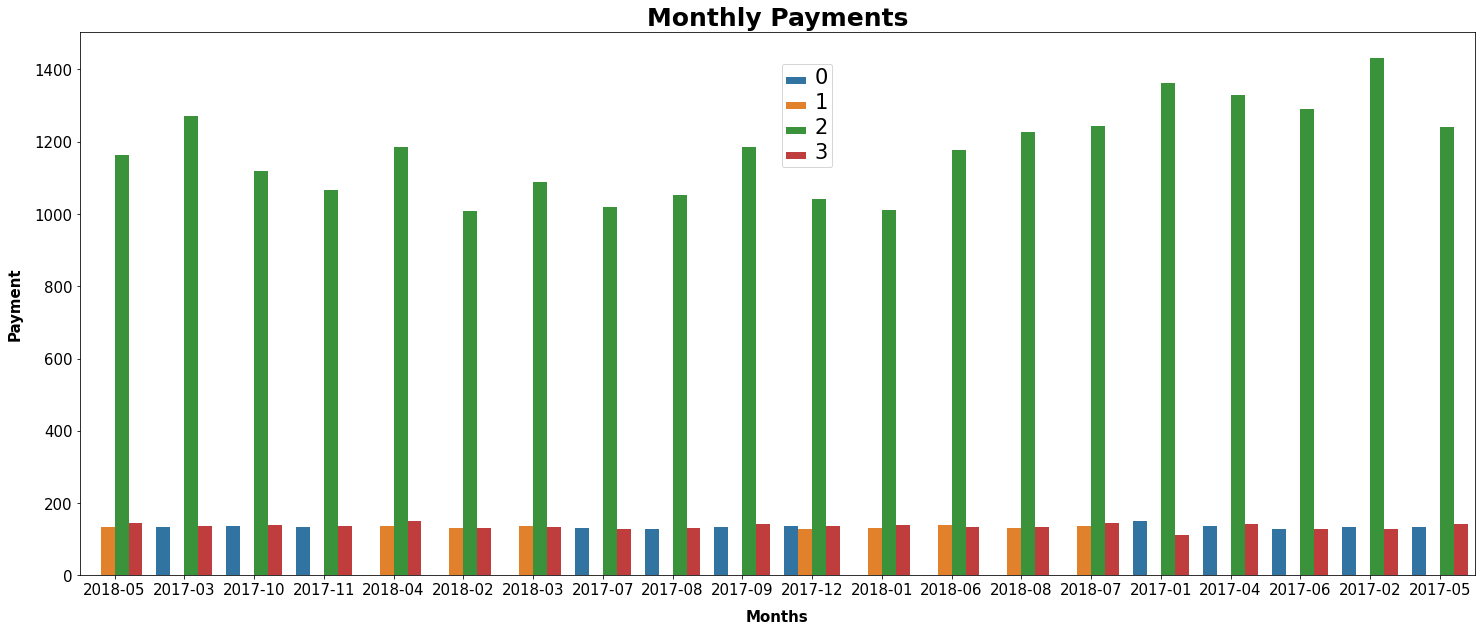

In [106]:
fig,ax = plt.subplots(figsize=(25,10))

params = {'xtick.labelsize': 15,
          'ytick.labelsize': 15 }
plt.rcParams.update(params)


sns.barplot(x="month_year",y='payment_value' ,data=df_full,ax=ax,hue='clusters',ci=None)
plt.legend(bbox_to_anchor=(0.5, 0.95, 0, 0))
plt.setp(ax.get_legend().get_texts(), fontsize='21') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='21')
ax.set_title('Monthly Payments',fontsize=25,weight='bold')
ax.set_xlabel("Months",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
ax.set_ylabel("Payment",fontsize=15,labelpad=20,ha='center',va='center',weight='bold')
plt.show()